In [3]:
# Install required packages
install.packages("tidyverse")
install.packages("caret")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Titanic Survival Analysis - Base R Version

# Step 1: Load available packages (no installation needed)
library(datasets)  # For Titanic data
library(ggplot2)   # Usually pre-installed


In [5]:
# Step 2: Load and inspect the dataset
cat("Step 1: Loading Titanic Dataset\n")
data(Titanic)

# Convert to data frame
titanic_df <- as.data.frame(Titanic)
cat("Dataset structure:\n")
print(str(titanic_df))
cat("\nFirst few rows:\n")
print(head(titanic_df))

Step 1: Loading Titanic Dataset
Dataset structure:
'data.frame':	32 obs. of  5 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Sex     : Factor w/ 2 levels "Male","Female": 1 1 1 1 2 2 2 2 1 1 ...
 $ Age     : Factor w/ 2 levels "Child","Adult": 1 1 1 1 1 1 1 1 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq    : num  0 0 35 0 0 0 17 0 118 154 ...
NULL

First few rows:
  Class    Sex   Age Survived Freq
1   1st   Male Child       No    0
2   2nd   Male Child       No    0
3   3rd   Male Child       No   35
4  Crew   Male Child       No    0
5   1st Female Child       No    0
6   2nd Female Child       No    0


In [7]:
# Step 3: Create expanded dataset
cat("\nStep 2: Preparing Data\n")
expanded_titanic <- titanic_df[rep(1:nrow(titanic_df), titanic_df$Freq), 1:4]
expanded_titanic$SurvivedNum <- ifelse(expanded_titanic$Survived == "Yes", 1, 0)
cat("Expanded data summary:\n")
print(table(expanded_titanic$Class, expanded_titanic$Survived))


Step 2: Preparing Data
Expanded data summary:
      
        No Yes
  1st  122 203
  2nd  167 118
  3rd  528 178
  Crew 673 212


In [8]:
# Step 4: Descriptive statistics
cat("\nStep 3: Descriptive Statistics\n")

# Survival by class
cat("Survival by Passenger Class:\n")
class_stats <- aggregate(SurvivedNum ~ Class, data = expanded_titanic,
                        FUN = function(x) c(Count = length(x),
                                           Survived = sum(x),
                                           Rate = mean(x)))
print(class_stats)

# Survival by gender
cat("\nSurvival by Gender:\n")
gender_stats <- aggregate(SurvivedNum ~ Sex, data = expanded_titanic,
                         FUN = function(x) c(Count = length(x),
                                            Survived = sum(x),
                                            Rate = mean(x)))
print(gender_stats)



Step 3: Descriptive Statistics
Survival by Passenger Class:
  Class SurvivedNum.Count SurvivedNum.Survived SurvivedNum.Rate
1   1st       325.0000000          203.0000000        0.6246154
2   2nd       285.0000000          118.0000000        0.4140351
3   3rd       706.0000000          178.0000000        0.2521246
4  Crew       885.0000000          212.0000000        0.2395480

Survival by Gender:
     Sex SurvivedNum.Count SurvivedNum.Survived SurvivedNum.Rate
1   Male      1731.0000000          367.0000000        0.2120162
2 Female       470.0000000          344.0000000        0.7319149



Step 4: Data Visualization


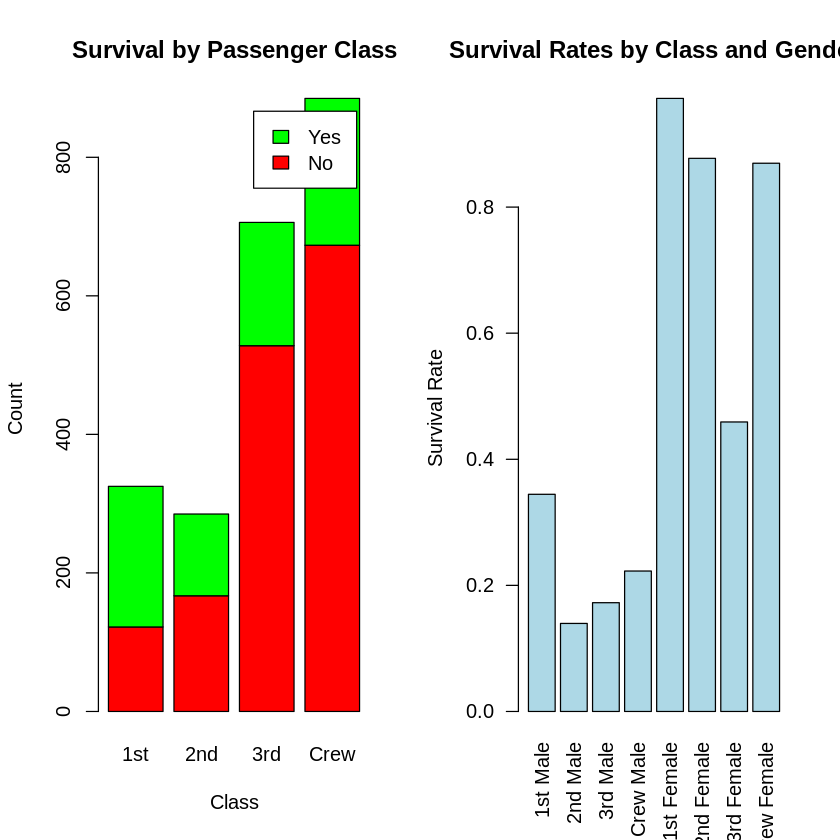

In [9]:
# Step 5: Data visualization
cat("\nStep 4: Data Visualization\n")

# Plot 1: Survival by class
par(mfrow = c(1, 2))  # Set up 1x2 plotting area

# Bar plot of survival by class
survival_table <- table(expanded_titanic$Class, expanded_titanic$Survived)
barplot(t(survival_table),
        main = "Survival by Passenger Class",
        xlab = "Class",
        ylab = "Count",
        col = c("red", "green"),
        legend = TRUE)

# Survival rates by class and gender
survival_rates <- aggregate(SurvivedNum ~ Class + Sex, data = expanded_titanic, mean)
barplot(survival_rates$SurvivedNum,
        names.arg = paste(survival_rates$Class, survival_rates$Sex),
        main = "Survival Rates by Class and Gender",
        ylab = "Survival Rate",
        col = "lightblue",
        las = 2)

In [10]:
# Step 6: Statistical testing
cat("\nStep 5: Statistical Tests\n")

# Chi-square test for class vs survival
class_test <- chisq.test(table(expanded_titanic$Class, expanded_titanic$Survived))
cat("Class vs Survival chi-square test:\n")
print(class_test)

# Chi-square test for gender vs survival
gender_test <- chisq.test(table(expanded_titanic$Sex, expanded_titanic$Survived))
cat("\nGender vs Survival chi-square test:\n")
print(gender_test)


Step 5: Statistical Tests
Class vs Survival chi-square test:

	Pearson's Chi-squared test

data:  table(expanded_titanic$Class, expanded_titanic$Survived)
X-squared = 190.4, df = 3, p-value < 2.2e-16


Gender vs Survival chi-square test:

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(expanded_titanic$Sex, expanded_titanic$Survived)
X-squared = 454.5, df = 1, p-value < 2.2e-16



In [11]:
# Step 7: Simple predictive modeling (using base R)
cat("\nStep 6: Simple Predictive Analysis\n")

# Create a simple logistic regression model
model <- glm(SurvivedNum ~ Class + Sex + Age,
            data = expanded_titanic,
            family = binomial)

cat("Logistic Regression Results:\n")
print(summary(model))



Step 6: Simple Predictive Analysis
Logistic Regression Results:

Call:
glm(formula = SurvivedNum ~ Class + Sex + Age, family = binomial, 
    data = expanded_titanic)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6853     0.2730   2.510   0.0121 *  
Class2nd     -1.0181     0.1960  -5.194 2.05e-07 ***
Class3rd     -1.7778     0.1716 -10.362  < 2e-16 ***
ClassCrew    -0.8577     0.1573  -5.451 5.00e-08 ***
SexFemale     2.4201     0.1404  17.236  < 2e-16 ***
AgeAdult     -1.0615     0.2440  -4.350 1.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.5  on 2200  degrees of freedom
Residual deviance: 2210.1  on 2195  degrees of freedom
AIC: 2222.1

Number of Fisher Scoring iterations: 4



In [12]:
# Step 8: Odds ratios and interpretation
cat("\nStep 7: Interpretation\n")
odds_ratios <- exp(coef(model))
cat("Odds Ratios:\n")
for(i in 1:length(odds_ratios)) {
  cat(names(odds_ratios)[i], ":", round(odds_ratios[i], 3), "\n")
}



Step 7: Interpretation
Odds Ratios:
(Intercept) : 1.984 
Class2nd : 0.361 
Class3rd : 0.169 
ClassCrew : 0.424 
SexFemale : 11.247 
AgeAdult : 0.346 


In [13]:
# Step 9: Key findings
cat("\nStep 8: Key Findings\n")
cat("=== TITANIC SURVIVAL ANALYSIS RESULTS ===\n")

# Calculate overall survival rate
overall_survival <- mean(expanded_titanic$SurvivedNum)
cat("1. Overall survival rate:", round(overall_survival * 100, 1), "%\n")

# Find highest survival group
group_rates <- aggregate(SurvivedNum ~ Class + Sex + Age, data = expanded_titanic, mean)
best_group <- group_rates[which.max(group_rates$SurvivedNum), ]
cat("2. Highest survival group:",
    paste(best_group$Class, best_group$Sex, best_group$Age),
    "-", round(best_group$SurvivedNum * 100, 1), "% survival\n")

# Find lowest survival group
worst_group <- group_rates[which.min(group_rates$SurvivedNum), ]
cat("3. Lowest survival group:",
    paste(worst_group$Class, worst_group$Sex, worst_group$Age),
    "-", round(worst_group$SurvivedNum * 100, 1), "% survival\n")

cat("4. Statistical tests show both class and gender significantly affect survival (p < 0.001)\n")
cat("5. First class passengers had much higher survival odds\n")
cat("6. Females had significantly better survival chances than males\n")


Step 8: Key Findings
=== TITANIC SURVIVAL ANALYSIS RESULTS ===
1. Overall survival rate: 32.3 %
2. Highest survival group: 1st Male Child - 100 % survival
3. Lowest survival group: 2nd Male Adult - 8.3 % survival
4. Statistical tests show both class and gender significantly affect survival (p < 0.001)
5. First class passengers had much higher survival odds
6. Females had significantly better survival chances than males
